# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
import numpy as np


Z = np.zeros((3, 4))
diag = np.diag([1, 2, 3, 4, 5])
diag_tr = np.trace(diag)
diag_inv = np.linalg.inv(diag)
X = np.random.rand(4, 5)
X_det = np.linalg.det(X[1:3, 0:2])
X_T_X = X.T.dot(X)

print(Z)
print(diag)
print(diag_tr)
print(diag_inv)
print(X)
print(X_det)
print(X_T_X)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
15
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]
[[0.09620938 0.67560852 0.74645368 0.27315977 0.27349389]
 [0.37783242 0.10208054 0.694569   0.8525053  0.95685482]
 [0.0322902  0.24635696 0.38711393 0.71566143 0.60633969]
 [0.30549574 0.1753894  0.86192329 0.97633489 0.46847713]]
0.08978544491267229
[[0.24638389 0.16510485 0.61006041 0.66975968 0.55054005]
 [0.16510485 0.5583205  0.82175286 0.61912023 0.51399298]
 [0.61006041 0.82175286 1.93238814 1.91459316 1.5072661 ]
 [0.66975968 0.61912023 1.91459316 2.26678266 1.78175584]
 [0.55054005 0.51399298 1.5072661  1.78175584 1.5774887 ]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def E1(A, column, current_row, sign):
    A[current_row], A[column] = A[column], A[current_row]
    sign *= -1 if current_row != column else 1
    return sign


def E2(A, row, divider, sign):
    A[row] = [a / divider for a in A[row]]
    sign *= divider
    return sign


def E3(A, row, source_row, weight):
    A[row] = [(a + k * weight) for a, k in zip(A[row], A[source_row])]


def exists(A, column):
    current_row = None
    for r in range(column, len(A)):
        if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
              current_row = r
    return current_row


def my_det(X):
    sign = 1
    if X.shape[0] != X.shape[1]:
        return ValueError
    A = X.tolist()
    n = len(A)
    column = 0
    while column < n:
        current_row = exists(A, column)
        if current_row is None:
            return None
        if current_row != column:
            sign = E1(A, column, current_row, sign)
        sign = E2(A, column, A[column][column], sign)
        for r in range(column + 1, len(A)):
            E3(A, r, column, -A[r][column])
        column += 1
    det = 1
    for i in range(n):
        det *= A[i][i]
    return det * sign


Простая проверка:

In [ ]:
import numpy as np
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(np.linalg.det(X))
print(my_det(X))

-1.0
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
import scipy.linalg as sla


# Запустите этот блок кода
for _ in range(10000):
    X = np.random.rand(10, 10)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
        print(my_det(X), sla.det(X))
        break

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 11.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 15.1 µs per loop
10000 loops, best of 5: 123 µs per loop
The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 205 µs per loop
10 loops, best of 5: 54.2 ms per loop
10 loops, best of 5: 36 ms per loop
1 loop, best of 5: 1min 11s per loop


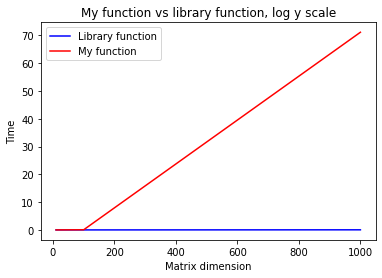

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

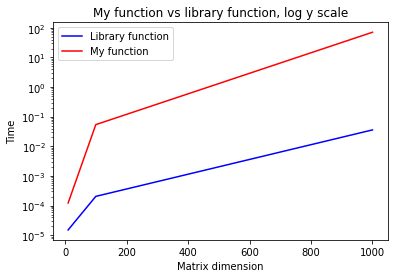

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
X_int, Y_int = np.array([[1, 0], [10 ** 20, 1]]), np.array([[10 ** -20, 1], [0, 1 - 10 ** 20]])
X_float, Y_float = np.array([[1., 0.], [10. ** 20, 1.]]), np.array([[10. ** -20, 1.], [0., 1. - 10. ** 20]])

In [ ]:
X_int.dot(Y_int)

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

In [ ]:
X_float.dot(Y_float)

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

И какой из них правильный?

---
**1**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
import numpy as np


def my_pascal(dim):
    result = []
    p = np.ones((2 * dim + 1, 2 * dim + 1))
    for i in range(1, 2 * dim + 1):
        for j in range(1, min(i, 2 * dim) + 1):
            p[i][j] = p[i - 1][j - 1] + p[i - 1][j] if j != i else 1
    for i in range(dim):
        row = []
        for j in range(dim):
            row.append(p[i + j][i])
        result.append(row)
    return np.array(result)

In [ ]:
my_pascal(6)

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   3.,   4.,   5.,   6.],
       [  1.,   3.,   6.,  10.,  15.,  21.],
       [  1.,   4.,  10.,  20.,  35.,  56.],
       [  1.,   5.,  15.,  35.,  70., 126.],
       [  1.,   6.,  21.,  56., 126., 252.]])

Чему равен её определитель? Строго поясните свой ответ.

----
**Матрица Паскаля может быть представлена вернхетреугольной матрицей с помощью элементарных операций, где на диагонали будут всегда находиться только единицы. Следовательно: определитель равен 1** (Также матрицы удовлетворяют равенству: Симметричная матрица паскаля = верхнетреугольная * нижнетреугольная матрица паскаля. У верхнетреугольной и нижнейтреугольной матрицы паскаля на диагоналях по определению единицы, следовательно определитель симметричный тоже единица)

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
import scipy

scipy.linalg.det(my_pascal(30))

4.6365440194083456e+47

Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

In [ ]:
x = 4
y = 2
scipy.linalg.det(np.array([[1, 1000], [100, 100001]]))

1.0000000000047748

Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

 Решение явно изменилось 

In [ ]:
x = 1004.01
y = 1

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
import math


def my_cond(A):
    if A.shape[0] != A.shape[1]:
        return ValueError
    cond = math.sqrt(np.trace(A.T.dot(A)) * np.trace((np.linalg.inv(A)).T.dot(np.linalg.inv(A))))
    return cond

Посчитайте число обусловленности матрицы из задания 3.3.

In [ ]:
my_cond(np.array([[1, 1000], [100, 100001]]))

10001210002.009096

Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

No handles with labels found to put in legend.


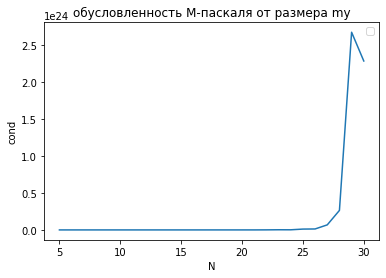

In [ ]:
import scipy


pascal = []
pascal_scipy = []
n = range(5, 31)
for i in n:
    pascal.append(my_cond(my_pascal(i)))
plt.plot(n, pascal)
plt.title('обусловленность M-паскаля от размера my')
plt.ylabel('cond')
plt.xlabel('N')
plt.legend()

In [ ]:
scipy.linalg.pascal(5)

array([[ 1,  1,  1,  1,  1],
       [ 1,  2,  3,  4,  5],
       [ 1,  3,  6, 10, 15],
       [ 1,  4, 10, 20, 35],
       [ 1,  5, 15, 35, 70]], dtype=uint64)

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
def prod_and_sq_sum(A):
    diag = np.diagonal(A)
    return diag.prod(), (diag ** 2).sum()

In [ ]:
A = np.array([[2, 2, 3, 0], [4, -9, 5, 7], [1, 0, -1, 8], [0, 3, 4, 10]])
prod_and_sq_sum(A)

(180, 186)

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
import numpy as np


def f(A, B, lmbd, k):
    m, n = A.shape
    mn = min(k, n)
    z = (lmbd[:mn] * A[:, :mn]).reshape(m, mn).dot(B[:, :mn].T.reshape(mn, m))
    print(z)

A = np.array([[2, 2, 3], [4, 9, 5], [1, 0, -1], [0, 3, 4]])
B = np.array([[1, 5, 4], [9, -8, 0], [7, 7, 8], [10, -1, -5]])
lmbd = np.array([1, 2, 3, 4])
f(A, B, lmbd, 2)

[[  22  -14   42   16]
 [  94 -108  154   22]
 [   1    9    7   10]
 [  30  -48   42   -6]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [ ]:
def get_diag(A, B):
    return np.einsum('ij,ji->i', A, B) # <=> (A * B.T).sum(axis=1) 

In [ ]:
import numpy as np


A = np.array([[1, -2, 3], [4, 5, 7], [9, -1, -5]])
B = np.array([[9, 1, 8], [-1, 6, -10], [0, 1, 0]])

In [ ]:
A

array([[ 1, -2,  3],
       [ 4,  5,  7],
       [ 9, -1, -5]])

In [ ]:
B.T

array([[  9,  -1,   0],
       [  1,   6,   1],
       [  8, -10,   0]])

In [ ]:
A

In [ ]:
(A * B.T)#.sum(axis=1)

array([[ 9,  2,  0],
       [ 4, 30,  7],
       [72, 10,  0]])

In [ ]:
np.diagonal(A.dot(B))

array([11, 41, 82])

In [ ]:
A = np.array([[1, -2, 3], [4, 5, 7], [9, -1, -5]])
B = np.array([[9, 1, 8], [-1, 6, -10], [0, 1, 0]])
get_diag(A, B) == np.diagonal(A.dot(B)) # Test

array([ True,  True,  True])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:
from math import cos, sin, radians


def shrink_rotate(x, a, coef=1., angle=0.):
    return coef * (x - a) * (cos(radians(angle)) + complex(0, sin(radians(angle)))) + a

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    AX_rotation_angle = shrink_rotate(x, a, coef, angle)
    return  AX_rotation_angle - 2 * complex(0, AX_rotation_angle.imag)
    
def geometric_inverse(X, a, r):
    x, y = X.real, X.imag
    n, m = a.real, a.imag
    a = r ** 2 / ((x - n) ** 2 + (y - m)**2)
    x_, y_ = a * (x - n) + n, a * (y - m) + m
    return complex(x_, y_)

**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

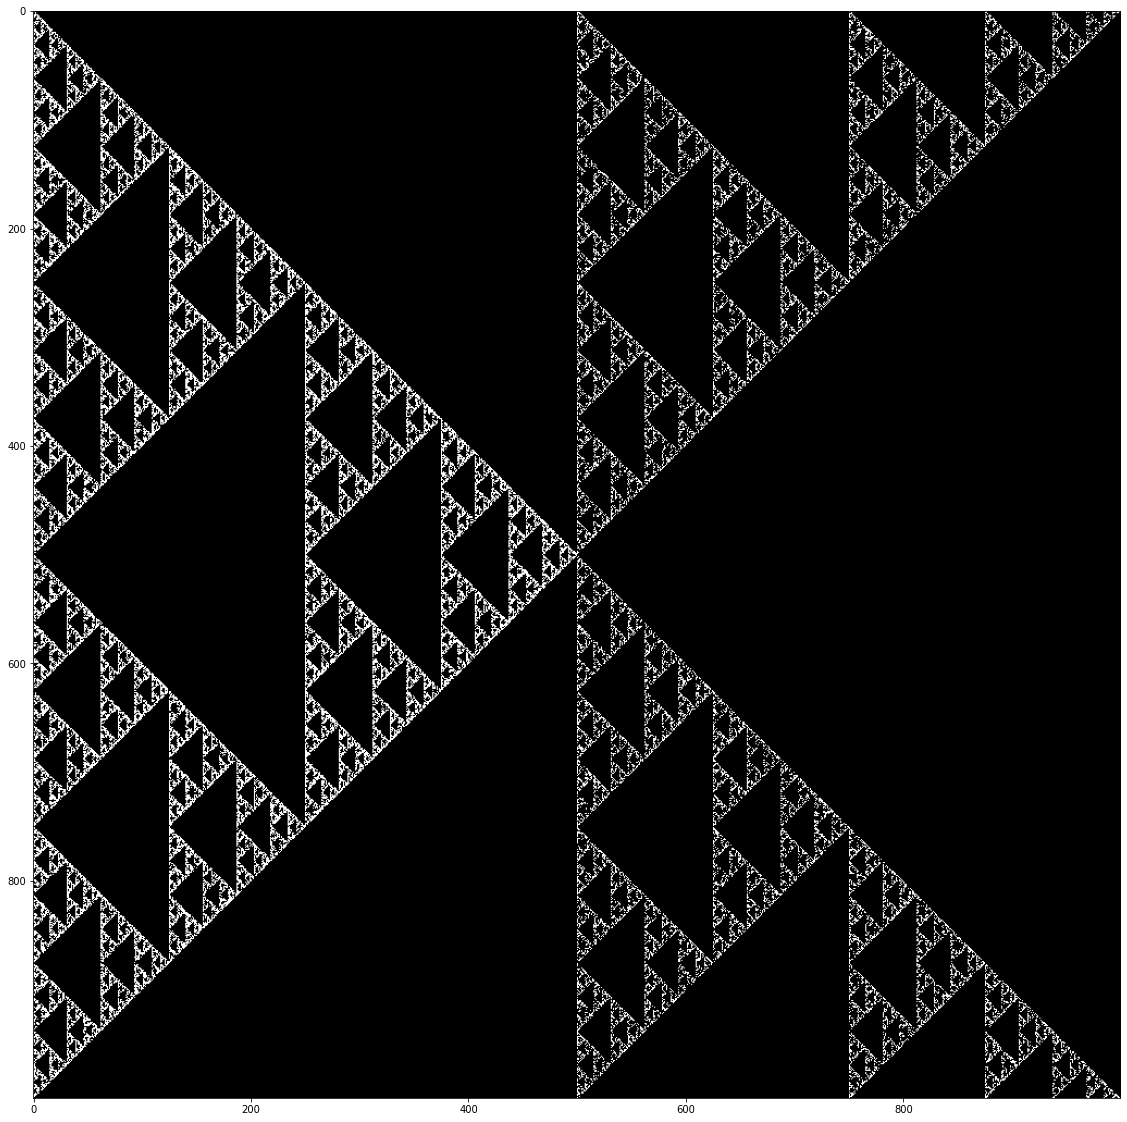

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

array = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        array[int(z.real * 1000)][int(z.imag * 1000)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(array, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Подобие треугольников Серпинского, итеративный метод. Самоподобие также поддерживается единством вложенных переодических функций (sin, cos, создающие вклад в четкие повторяющиеся переодчические рисунки). Коэффициент 0.5 постоянно делит сторону вектора пополам, после чего поворачивает на фиксированный угол, создавая тем самым практически бесконечные вложенные равносторонние треугольники (бесконечные при увеличении количества итераций)

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

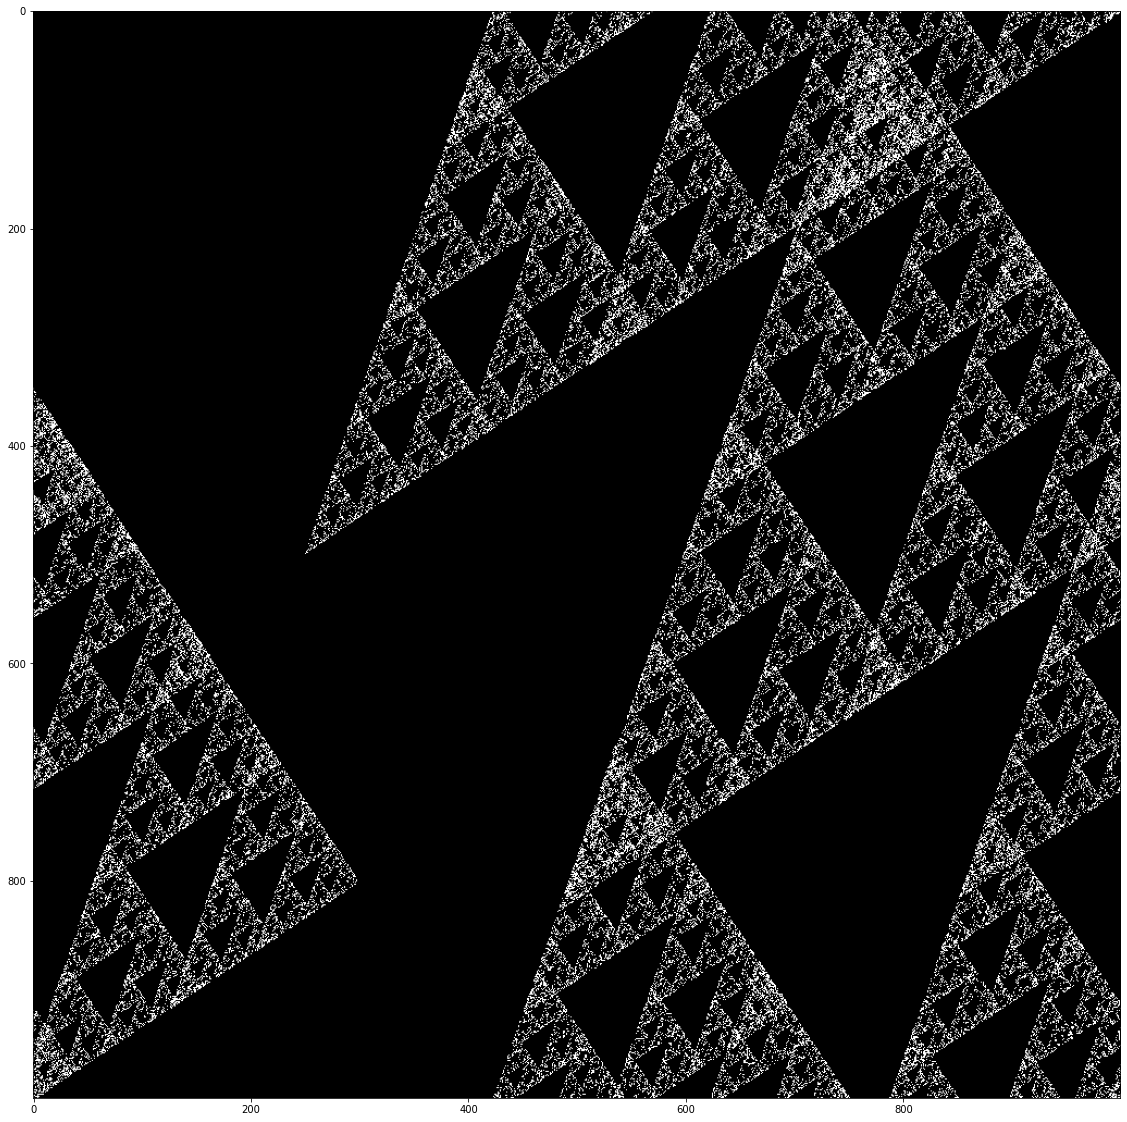

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000

funcs = [
    (lambda t: shrink_rotate(t, 0.5 - 0.751*1j, coef=0.55, angle=0.1)),
    (lambda t: shrink_rotate(t, -1 + -0.23*1j, coef=0.55, angle=0.1)),
    (lambda t: shrink_rotate(t, -0.2 + 0.3*1j, coef=0.55, angle=0.1))
]

array = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        array[int(z.real * 1000)][int(z.imag * 1000)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(array, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [ ]:
A = np.random.rand(4, 4)
B = np.random.rand(4, 2)


def inverse_multiply(A, B):
    return np.linalg.inv(A).dot(B)

def gauss_solve(A, B):
    A = A.tolist()
    B = B.tolist()
    def E1(A, B, row1, row2):
        A[row1], A[row2] = A[row2], A[row1]
        B[row1], B[row2] = B[row2], B[row1]

    def E2(A, B, row, divider):
        A[row] = [a / divider for a in A[row]]
        B[row] = [b / divider for b in B[row]]#divider

    def E3(A, B, row, source_row, weight):
        A[row] = [(a + k * weight) for a, k in zip(A[row], A[source_row])]
        B[row] = [(b + k * weight) for b, k in zip(B[row], B[source_row])] #B[source_row] * weight

    def exists(A, column):
        current_row = None
        for r in range(column, len(A)):
            if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
                  current_row = r
        return current_row

    column = 0
    while (column < len(B)):
        current_row = exists(A, column)
        if current_row is None:
            return None
        if current_row != column:
            E1(A, B, current_row, column)
        E2(A, B, column, A[column][column])
        for r in range(column + 1, len(A)):
            E3(A, B, r, column, -A[r][column])
        column += 1
  
    ans = []
    B = np.array(B)
    for _ in range(B.shape[1]):
        X = [0 for b in B]
        B_now = [B[i][_] for i in range(B.shape[0])] 
        for i in range(B.shape[0] - 1, -1, -1):
            X[i] = B_now[i] - sum(x * a for x, a in zip(X[(i + 1):], A[i][(i + 1):]))
        ans.append(X)
    return np.array(ans).reshape(B.shape[0], B.shape[1])

In [ ]:
inverse_multiply(A, B)

array([[ 14.59339739, -10.90548283],
       [ -5.01602545,   4.87251374],
       [  7.19898541,  -6.06331128],
       [ -9.83249067,   8.44205071]])

In [ ]:
gauss_solve(A, B)

array([[ 14.59339739,  -5.01602545],
       [  7.19898541,  -9.83249067],
       [-10.90548283,   4.87251374],
       [ -6.06331128,   8.44205071]])

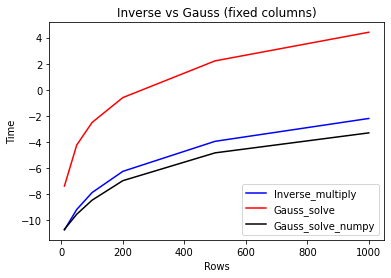

In [ ]:
m = 10
n_dim = [10, 50, 100, 200, 500, 1000]

inverse_times = []
gauss_times = []
numpy_gauss = []

for n in n_dim:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    inverse = %timeit -o inverse_multiply(A, B)
    inverse_times.append(inverse.best)
    gauss = %timeit -o gauss_solve(A, B)
    gauss_times.append(gauss.best)    
    gauss_n = %timeit -o np.linalg.solve(A, B)
    numpy_gauss.append(gauss_n.best)  

plt.plot(n_dim, np.log(inverse_times), color='blue', label='Inverse_multiply')
plt.plot(n_dim, np.log(gauss_times), color='red', label='Gauss_solve')
plt.plot(n_dim, np.log(numpy_gauss), color='black', label='Gauss_solve_numpy')
plt.title('Inverse vs Gauss (fixed columns)')
plt.ylabel('Time')
plt.xlabel('Rows')
plt.legend()

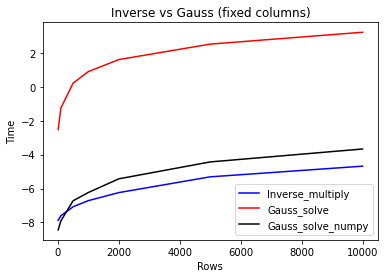

In [ ]:
n = 100
m_dim = [10, 100, 500, 1000, 2000, 5000, 10000]

inverse_times = []
gauss_times = []
numpy_gauss = []
for m in m_dim:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    inverse = %timeit -o inverse_multiply(A, B)
    inverse_times.append(inverse.best)
    gauss = %timeit -o gauss_solve(A, B)
    gauss_times.append(gauss.best)    
    gauss_n = %timeit -o np.linalg.solve(A, B)
    numpy_gauss.append(gauss_n.best)  

plt.plot(m_dim, np.log(inverse_times), color='blue', label='Inverse_multiply')
plt.plot(m_dim, np.log(gauss_times), color='red', label='Gauss_solve')
plt.plot(m_dim, np.log(numpy_gauss), color='black', label='Gauss_solve_numpy')
plt.title('Inverse vs Gauss (fixed columns)')
plt.ylabel('Time')
plt.xlabel('Rows')
plt.legend()

**Комментарий к работе двух функций:**

В общем случае, можно сделать вывод, что реализация поиска решения X = AB с использованием np.linalg.solve в разы превосходит скорость получения ответа с помощью метода Гаусса (без numpy) при любых входных данных из эксперимента, ощутимо превосходит реализации с использованием инверсии матрицы (при фиксированных колонках), но практически не отличается по скорости при увеличении количества вычисляемых переменных (т.е колонок).

**Асимпотитика алгоритмов:**

gauss_solve: в среднем O(n^3) 

inverse_multiply: в среднем O(n^3), но вычисления проводятся более оптимизированно, с использованием низкоуровневого языка на вычислениях

np.linalg.solve: в среднем O(n^3), но вычисления проводятся более оптимизированно, с использованием низкоуровневого языка на вычислениях
 
**Причины разницы во времени выполнения:**

1) Не оптимизированный код gauss_solve, в отличие от строго оптимизированных элементарных операций numpy и решения с обратной матрицей.

2) Реализация функционала на Python, в отличие от операций в функции inverse_multiply и np.linalg.solve, преимущественно выполняемые на низкоуровневых этапах

3) Существенно больше выделяемая доп.память в gauss_solve (также относится к 1)

4) При увеличении количества рядов, np.linalg.solve успешно сокращает количество выполняемых операций для получения решения с помощью LU, но не дает преимуществ при увеличении количества переменных.